In [ ]:
import pandas as pd
import sys

# 성능 평가표

1.   logistic regression(k-fold X)(CountVectorizer사용)
     
    acc: 0.88619(test비율 0.3)

    acc: 0.88598(test비율 0.2)

2. logistic regression(k-fold X)(TfidfVectorizer사용)

    acc: 0.8962682(test비율 0.3)
    
    acc: 0.89626(test비율 0.2)(label 2를 분류하는데 좀 더 좋다.)(label 2가 f1-score:0.19)

=> k-fold 안 할시, TfidfVectorizer(test비율 0.2)가 좋다.

--------------------------------------------

3.   logistic regression(k-fold)(CountVectorizer사용)

     acc: 0.885629(test비율 0.3)

     acc: 0.88417(test비율 0.2)

4.  logistic regrssion(k-fold)(TfidfVecotrizer사용)

    acc: 0.8851408535848144(test비율 0.2)

    acc: 0.8838558878052712(test비율 0.3)

---------------------------------------------

5. Bi-lstm(keras embedding)

   acc: 0.8667633901583848

6. Bi-lstm(keras.embedding)+k-fold

   acc: 0.8954177245798574(label 2가 f1-score:0.23로 가장 좋은듯)

--------------------------------------------

7. Bert Tokenizer&Embedding + Bi-lstm

  acc: 0.8557610929754564

---------------------------------------------
이제부터 label 0과 1 사용

7. Bi-lstm(keras embedding) - k-fold 추가(불균형 맞추기)

  acc: 0.9296004008518101(f1 score: 0.81, 0.96)(onesideselection)

  acc: 0.76(SMOTHEENN)

8. 1D-CNN(keras embedding) + k-fold(불균형 조정)

  acc: 0.9359889765752224(f1 score: 0.82, 0.96)

  (roc_curve: 0.8790103584959378)

In [ ]:
import pandas as pd
labeldf=pd.DataFrame(columns=['label','sentence'])

In [ ]:
dff=pd.read_excel("/content/spell_labeling.xlsx")
dff

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,label,sentence
0,0,0,0,0,창문 구조 자체가 방음이 잘되지 않고 찬바람이 들어오는 것 같아요.
1,1,1,1,0,지금 새벽 네시가 다 되어 가는데 밖에 경찰차 소리가 엄청나게 크게 들리네요?.
2,2,2,2,0,난방도 기능은 존재하는데 되는지를 모르겠네요.
3,3,3,3,0,별로 춥지 않아서 컴플레인은 걸지 않았지만 겨울철 되면 문제가 커질 것 같고요.
4,4,4,4,0,그리고 화장실 문이 심하게 덜 렁 꺼리고 콘센트가 거의 없어서 매우 불편했습니다.
...,...,...,...,...,...
41350,41350,41350,41350,1,젛았습니다습니다
41351,41351,41351,41351,1,즇앗씁니다!니다!
41352,41352,41352,41352,1,좋ㅉㅗㅎ 앗습니다
41353,41353,41353,41353,1,펺습니다습니다


In [ ]:
labeldf['label']=dff['label']
labeldf['sentence']=dff['sentence']

In [ ]:
labeldf.loc[11224,'label']=1
labeldf.loc[12739,'label']=1

# 1. TF-IDF 후에, logistic regression 사용

In [ ]:
import re
labeldf['sentence'] = labeldf['sentence'].str.replace('<br />',' ')

labeldf['sentence']=labeldf['sentence'].apply(lambda x : re.sub('[^a-zA-Zㄱ-ㅎ|ㅏ-ㅣ|가-힣]',' ',str(x)))

In [ ]:
labeldf=labeldf[labeldf.label !=2 ]
labeldf=labeldf.reset_index()
labeldf

,index,label,sentence
0,0,0,창문 구조 자체가 방음이 잘되지 않고 찬바람이 들어오는 것 같아요
1,1,0,지금 새벽 네시가 다 되어 가는데 밖에 경찰차 소리가 엄청나게 크게 들리네요
2,2,0,난방도 기능은 존재하는데 되는지를 모르겠네요
3,3,0,별로 춥지 않아서 컴플레인은 걸지 않았지만 겨울철 되면 문제가 커질 것 같고요
4,4,0,그리고 화장실 문이 심하게 덜 렁 꺼리고 콘센트가 거의 없어서 매우 불편했습니다
...,...,...,...
39909,41350,1,젛았습니다습니다
39910,41351,1,즇앗씁니다 니다
39911,41352,1,좋ㅉㅗㅎ 앗습니다
39912,41353,1,펺습니다습니다


In [ ]:
target=labeldf['label']
feature=labeldf['sentence']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature,
                                                   target,
                                                   test_size=0.2,
                                                   random_state=42)

In [ ]:
r = open('/content/한국어불용어100.txt', mode='rt', encoding='utf-8')
stopwords=[]
z=r.readlines()
for i in range(len(z)):
  stopwords.append(z[i].split('\t')[0])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


pipeline = Pipeline([('cnt_vect',TfidfVectorizer(stop_words=stopwords,
                                               ngram_range=(1,2))),
                    ('lr_clf', LogisticRegression(C=10))])

In [ ]:
## 위에서 설정해준 Pipleline으로 데이터 학습시킬 때는 벡터화시키기 전의 원본 데이터

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
y_pred.shape

(7983,)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
# '1' label로 예측될 확률 추출 for roc_auc_score
y_pred_proba = pipeline.predict_proba(X_test)

acc = accuracy_score(y_test, y_pred)
#auc = roc_auc_score(y_test, y_pred_proba,average='macro', sample_weight=None)

In [ ]:
print(acc)
y_pred_proba[0][0]

0.9324815232368784


0.7894405639120945

In [ ]:
y_pred_proba1=[]
for i in range(len(y_pred_proba)):
  if y_pred_proba[i][0]>y_pred_proba[i][1]:
    y_pred_proba1.append(0)
  elif y_pred_proba[i][1]>y_pred_proba[i][0]:
    y_pred_proba1.append(1)

In [ ]:
if 3 in y_test:
  print("yes")

In [ ]:
y_test.unique()

array([1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred_proba1))
print(classification_report(y_test, y_pred_proba1, target_names=['0', '1']))

[[1168  305]
 [ 234 6276]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1473
           1       0.95      0.96      0.96      6510

    accuracy                           0.93      7983
   macro avg       0.89      0.88      0.89      7983
weighted avg       0.93      0.93      0.93      7983



In [ ]:
y_pred_proba

array([[1.80845232e-03, 9.83091166e-01, 1.51003821e-02],
       [2.51541299e-03, 9.19706232e-01, 7.77783549e-02],
       [3.13871865e-01, 5.99378444e-01, 8.67496908e-02],
       ...,
       [2.41965361e-02, 3.67430053e-01, 6.08373411e-01],
       [6.03523601e-04, 9.99165433e-01, 2.31043141e-04],
       [1.75118333e-03, 9.95785961e-01, 2.46285550e-03]])

# 2. logstic regression + K-fold

In [ ]:
import pandas as pd
dff=pd.read_excel("/content/spell_labeling.xlsx")

In [ ]:
print(dff.loc[dff['label']==0].count())
print(dff.loc[dff['label']==1].count())
print(dff.loc[dff['label']==2].count())
#심각한 데이터 편차

Unnamed: 0        7575
Unnamed: 0.1      7575
Unnamed: 0.1.1    7575
label             7575
sentence          7575
dtype: int64
Unnamed: 0        32337
Unnamed: 0.1      32337
Unnamed: 0.1.1    32337
label             32337
sentence          32337
dtype: int64
Unnamed: 0        1441
Unnamed: 0.1      1441
Unnamed: 0.1.1    1441
label             1441
sentence          1441
dtype: int64


In [ ]:
labeldf=pd.DataFrame(columns=['label','sentence'])
labeldf['label']=dff['label']
labeldf['sentence']=dff['sentence']

In [ ]:
labeldf.loc[11224,'label']=1
labeldf.loc[12739,'label']=1

In [ ]:
import re
labeldf['sentence'] = labeldf['sentence'].str.replace('<br />',' ')

labeldf['sentence']=labeldf['sentence'].apply(lambda x : re.sub('[^a-zA-Zㄱ-ㅎ|ㅏ-ㅣ|가-힣]',' ',str(x)))

In [ ]:
target=labeldf['label']
feature=labeldf['sentence']

**불용어 처리**

In [ ]:
r = open('/content/한국어불용어100.txt', mode='rt', encoding='utf-8')
stopwords=[]
z=r.readlines()
for i in range(len(z)):
  stopwords.append(z[i].split('\t')[0])

In [ ]:
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip() not in stopwords:
            final_text.append(i.strip())
    return " ".join(final_text)

In [ ]:
feature = feature.apply(remove_stopwords)
X_train=feature.values
y_train=labeldf['label'].values

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

transformer = TfidfVectorizer(ngram_range=(1,2))
X_train=transformer.fit_transform(X_train)

In [ ]:
print(X_train.shape)

(41355, 124511)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(C=10)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train,
                                                   y_train,
                                                   test_size=0.3,
                                                   random_state=42)

In [ ]:
#교차검증을 해보자!
import numpy as np
from sklearn.model_selection import StratifiedKFold
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
p_validation = np.zeros((X_train.shape[0],))
p_validation.shape

(28948,)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model, to_categorical

p_validation = np.zeros((X_train.shape[0],))
p_test = np.zeros((X_test.shape[0],3))
for i, (i_train, i_validation) in enumerate(cross_validation.split(X_train, y_train), 1):
    
    print(f'\n training model for 교차검증 # {i}번째 \n')

    print(f'학습인덱스 : {i_train} | 학습데이터에 사용되는 데이터 : {len(i_train)}')
    print(f'검증인덱스 : {i_validation} | 검증에 사용하는 데이터 : {len(i_validation)}\n')
    print('-' * 90)
    
    class_model = lr_clf   
    print(X_train[i_train].shape)
    history = class_model.fit(X_train[i_train], 
            y_train[i_train])
    p_validation[i_validation,] = class_model.predict(X_train[i_validation])
    p_test += class_model.predict_proba(X_test)/5
    print('-' * 90)


 training model for 교차검증 # 1번째 

학습인덱스 : [    0     1     2 ... 28944 28945 28947] | 학습데이터에 사용되는 데이터 : 23158
검증인덱스 : [    7     8    24 ... 28935 28936 28946] | 검증에 사용하는 데이터 : 5790

------------------------------------------------------------------------------------------
(23158, 124511)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


------------------------------------------------------------------------------------------

 training model for 교차검증 # 2번째 

학습인덱스 : [    0     1     2 ... 28944 28946 28947] | 학습데이터에 사용되는 데이터 : 23158
검증인덱스 : [    4     5     9 ... 28938 28939 28945] | 검증에 사용하는 데이터 : 5790

------------------------------------------------------------------------------------------
(23158, 124511)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


------------------------------------------------------------------------------------------

 training model for 교차검증 # 3번째 

학습인덱스 : [    0     1     2 ... 28945 28946 28947] | 학습데이터에 사용되는 데이터 : 23158
검증인덱스 : [   10    15    18 ... 28931 28941 28943] | 검증에 사용하는 데이터 : 5790

------------------------------------------------------------------------------------------
(23158, 124511)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


------------------------------------------------------------------------------------------

 training model for 교차검증 # 4번째 

학습인덱스 : [    2     3     4 ... 28944 28945 28946] | 학습데이터에 사용되는 데이터 : 23159
검증인덱스 : [    0     1    12 ... 28937 28942 28947] | 검증에 사용하는 데이터 : 5789

------------------------------------------------------------------------------------------
(23159, 124511)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


------------------------------------------------------------------------------------------

 training model for 교차검증 # 5번째 

학습인덱스 : [    0     1     4 ... 28945 28946 28947] | 학습데이터에 사용되는 데이터 : 23159
검증인덱스 : [    2     3     6 ... 28933 28940 28944] | 검증에 사용하는 데이터 : 5789

------------------------------------------------------------------------------------------
(23159, 124511)
------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.metrics import accuracy_score, log_loss 
print(accuracy_score(y_train, p_validation) * 100)

88.83860715766203


In [ ]:
y_pred=[]
for i in range(len(p_test)):
  if p_test[i][0]>p_test[i][1] and p_test[i][0]>p_test[i][2]:
    y_pred.append(0)
  elif p_test[i][1]>p_test[i][0] and p_test[i][1]>p_test[i][2]:
    y_pred.append(1)
  elif p_test[i][2]>p_test[i][0] and p_test[i][2]>p_test[i][1]:
    y_pred.append(2)

In [ ]:
acc = accuracy_score(y_test,y_pred)
print(acc)

0.8838558878052712


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['0', '1', '2']))

[[1557  792    4]
 [ 238 9389   10]
 [  91  306   20]]
              precision    recall  f1-score   support

           0       0.83      0.66      0.73      2353
           1       0.90      0.97      0.93      9637
           2       0.59      0.05      0.09       417

    accuracy                           0.88     12407
   macro avg       0.77      0.56      0.59     12407
weighted avg       0.87      0.88      0.87     12407



# 3. Bi-Lstm(keras embedding 사용)

In [ ]:
dff=pd.read_excel("/content/spell_labeling.xlsx")
dff

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,label,sentence
0,0,0,0,0,창문 구조 자체가 방음이 잘되지 않고 찬바람이 들어오는 것 같아요.
1,1,1,1,0,지금 새벽 네시가 다 되어 가는데 밖에 경찰차 소리가 엄청나게 크게 들리네요?.
2,2,2,2,0,난방도 기능은 존재하는데 되는지를 모르겠네요.
3,3,3,3,0,별로 춥지 않아서 컴플레인은 걸지 않았지만 겨울철 되면 문제가 커질 것 같고요.
4,4,4,4,0,그리고 화장실 문이 심하게 덜 렁 꺼리고 콘센트가 거의 없어서 매우 불편했습니다.
...,...,...,...,...,...
41350,41350,41350,41350,1,젛았습니다습니다
41351,41351,41351,41351,1,즇앗씁니다!니다!
41352,41352,41352,41352,1,좋ㅉㅗㅎ 앗습니다
41353,41353,41353,41353,1,펺습니다습니다


In [ ]:
feature=dff['sentence']

In [ ]:
dff.loc[11224,'label']=1
dff.loc[12739,'label']=1

In [ ]:
r = open('/content/한국어불용어100.txt', mode='rt', encoding='utf-8')
stopwords=[]
z=r.readlines()
for i in range(len(z)):
  stopwords.append(z[i].split('\t')[0])

In [ ]:
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip() not in stopwords:
            final_text.append(i.strip())
    return " ".join(final_text)

In [ ]:
import re
feature = feature.str.replace('<br />',' ')

feature=feature.apply(lambda x : re.sub('[^a-zA-Zㄱ-ㅎ|ㅏ-ㅣ|가-힣]',' ',str(x)))

In [ ]:
feature = feature.apply(remove_stopwords)
feature = np.array([x for x in feature])

In [ ]:
from keras.utils import np_utils
from tensorflow.keras.utils import plot_model, to_categorical

y_train=dff['label'].values
train_y = np_utils.to_categorical(y_train)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature,
                                                   train_y,
                                                   test_size=0.2,
                                                   random_state=42)

In [ ]:
import seaborn as sns

X_trainlen = X_train.apply(lambda x : len(x.split()))

def plot_doc_lengths(X_trainlen):
    max_seq_len = np.round(X_trainlen.mean() + X_trainlen.std()).astype(int)
    sns.distplot(tuple(X_trainlen), hist=True, kde=True, label='Document lengths')
    plt.axvline(x=max_seq_len, color='k', linestyle='--', label=f'Sequence length mean:{max_seq_len}')
    plt.title('Document lengths')
    plt.legend()
    plt.show()
    print(f" 가장 긴 문장은 {X_trainlen.max()} 개의 단어를, 평균 문장은 {X_trainlen.mean()} 개의 단어를, 가장 짧은 문장은 {X_trainlen.min()} 개의 단어를 가지고 있습니다.")

plot_doc_lengths(X_trainlen)

AttributeError: ignored

In [ ]:
embedding_dim=300
max_length=72
padding_type='post'

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train) 
word_index = tokenizer.word_index

vocab_size=len(word_index)+1 #vocabulary 크기 설정
print(vocab_size)

24726


In [ ]:
from keras_preprocessing.sequence import pad_sequences 

#데이터를 sequence로 변환하고 padding 해주기
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length) 

test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, padding=padding_type, maxlen=max_length)

print(train_padded.shape, test_padded.shape)

(33084, 72) (8271, 72)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

epoch_val = 10
model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_length),
        Bidirectional(LSTM(64, return_sequences=True)),
        Bidirectional(LSTM(64, return_sequences = True)),
        Bidirectional(LSTM(64)),
        Dense(3, activation='softmax')
    ])
    
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
y_train.shape

(33084, 3)

In [ ]:
history = model.fit(train_padded, y_train, epochs=50, batch_size=100, validation_split= 0.2) 

Epoch 1/50
265/265 [==============================] - 70s 223ms/step - loss: 0.4524 - accuracy: 0.8338 - val_loss: 0.2868 - val_accuracy: 0.8981
Epoch 2/50
265/265 [==============================] - 57s 215ms/step - loss: 0.1859 - accuracy: 0.9386 - val_loss: 0.2917 - val_accuracy: 0.9006
Epoch 3/50
265/265 [==============================] - 57s 215ms/step - loss: 0.1119 - accuracy: 0.9622 - val_loss: 0.3537 - val_accuracy: 0.8805
Epoch 4/50
265/265 [==============================] - 56s 212ms/step - loss: 0.0612 - accuracy: 0.9825 - val_loss: 0.4050 - val_accuracy: 0.8803
Epoch 5/50
265/265 [==============================] - 57s 214ms/step - loss: 0.0399 - accuracy: 0.9890 - val_loss: 0.4828 - val_accuracy: 0.8838
Epoch 6/50
265/265 [==============================] - 57s 214ms/step - loss: 0.0330 - accuracy: 0.9910 - val_loss: 0.4800 - val_accuracy: 0.8799
Epoch 7/50
265/265 [==============================] - 57s 216ms/step - loss: 0.0291 - accuracy: 0.9919 - val_loss: 0.5251 - val_ac

<function matplotlib.pyplot.show>

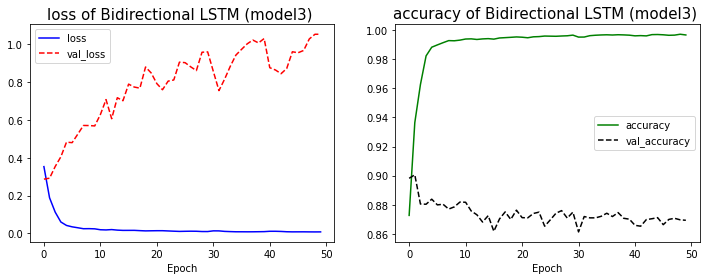

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('loss of Bidirectional LSTM (model3) ', fontsize= 15)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'],'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('accuracy of Bidirectional LSTM (model3) ', fontsize= 15)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'],'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show

In [ ]:
y_pred_proba = model.predict(test_padded)

In [ ]:
len(y_pred_proba)

8271

In [ ]:
y_pred_proba1=[]
for i in range(len(y_pred_proba)):
  if y_pred_proba[i][0]>y_pred_proba[i][1] and y_pred_proba[i][0]>y_pred_proba[i][2]:
    y_pred_proba1.append(0)
  elif y_pred_proba[i][1]>y_pred_proba[i][0] and y_pred_proba[i][1]>y_pred_proba[i][2]:
    y_pred_proba1.append(1)
  elif y_pred_proba[i][2]>y_pred_proba[i][0] and y_pred_proba[i][2]>y_pred_proba[i][1]:
    y_pred_proba1.append(2)

In [ ]:
len(y_pred_proba1)

8271

In [ ]:
y_test_proba1=[]
for i in range(len(y_test)):
  if y_test[i][0]==1:
    y_test_proba1.append(0)
  elif y_test[i][1]==1:
    y_test_proba1.append(1)
  elif y_test[i][2]==1:
    y_test_proba1.append(2)

In [ ]:
acc = accuracy_score(y_test_proba1, y_pred_proba1)

In [ ]:
print(acc)

0.8667633901583848


# 4. Bi-lstm(keras embedding) - k-fold 추가

In [ ]:
dff=pd.read_excel("/content/spell_labeling.xlsx")
dff

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,label,sentence
0,0,0,0,0,창문 구조 자체가 방음이 잘되지 않고 찬바람이 들어오는 것 같아요.
1,1,1,1,0,지금 새벽 네시가 다 되어 가는데 밖에 경찰차 소리가 엄청나게 크게 들리네요?.
2,2,2,2,0,난방도 기능은 존재하는데 되는지를 모르겠네요.
3,3,3,3,0,별로 춥지 않아서 컴플레인은 걸지 않았지만 겨울철 되면 문제가 커질 것 같고요.
4,4,4,4,0,그리고 화장실 문이 심하게 덜 렁 꺼리고 콘센트가 거의 없어서 매우 불편했습니다.
...,...,...,...,...,...
41350,41350,41350,41350,1,젛았습니다습니다
41351,41351,41351,41351,1,즇앗씁니다!니다!
41352,41352,41352,41352,1,좋ㅉㅗㅎ 앗습니다
41353,41353,41353,41353,1,펺습니다습니다


In [ ]:
feature=dff['sentence']

In [ ]:
dff.loc[11224,'label']=1
dff.loc[12739,'label']=1

In [ ]:
r = open('/content/한국어불용어100.txt', mode='rt', encoding='utf-8')
stopwords=[]
z=r.readlines()
for i in range(len(z)):
  stopwords.append(z[i].split('\t')[0])

In [ ]:
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip() not in stopwords:
            final_text.append(i.strip())
    return " ".join(final_text)

In [ ]:
import re
feature = feature.str.replace('<br />',' ')

feature=feature.apply(lambda x : re.sub('[^a-zA-Zㄱ-ㅎ|ㅏ-ㅣ|가-힣]',' ',str(x)))

In [ ]:
feature = feature.apply(remove_stopwords)
feature = np.array([x for x in feature])

In [ ]:
from keras.utils import np_utils
from tensorflow.keras.utils import plot_model, to_categorical

y_train=dff['label'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature,
                                                   y_train,
                                                   test_size=0.2,
                                                   random_state=42)

In [ ]:
embedding_dim=300
max_length=72
padding_type='post'

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train) 
word_index = tokenizer.word_index

vocab_size=len(word_index)+1 #vocabulary 크기 설정
print(vocab_size)

24726


In [ ]:
from keras_preprocessing.sequence import pad_sequences 

#데이터를 sequence로 변환하고 padding 해주기
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length) 

test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, padding=padding_type, maxlen=max_length)

print(train_padded.shape, test_padded.shape)

(33084, 72) (8271, 72)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

epoch_val = 10
model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_length),
        Bidirectional(LSTM(64, return_sequences=True)),
        Bidirectional(LSTM(64, return_sequences = True)),
        Bidirectional(LSTM(64)),
        Dense(3, activation='softmax')
    ])
    
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
# 계층 교차 검증
n_fold = 5  
seed = 42

cv = StratifiedKFold(n_splits = n_fold, shuffle=True, random_state=seed)

# 테스트데이터의 예측값 담을 곳 생성
test_y = np.zeros((test_padded.shape[0], 3))

# 조기 종료 옵션 추가
es = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3,
                   verbose=1, mode='min', baseline=None, restore_best_weights=True)

for i, (i_trn, i_val) in enumerate(cv.split(train_padded, y_train), 1):
    print(f'training model for CV #{i}')

    model.fit(train_padded[i_trn], 
            to_categorical(y_train[i_trn]),
            validation_data=(train_padded[i_val], to_categorical(y_train[i_val])),
            epochs=10,
            batch_size=512,
            callbacks=[es])     # 조기 종료 옵션
                      
    test_y += model.predict(test_padded) / n_fold    # 나온 예측값들을 교차 검증 횟수로 나눈다

training model for CV #1
Epoch 1/10
52/52 [==============================] - 26s 316ms/step - loss: 0.6799 - accuracy: 0.7352 - val_loss: 0.3208 - val_accuracy: 0.8841
Epoch 2/10
52/52 [==============================] - 14s 262ms/step - loss: 0.2622 - accuracy: 0.9141 - val_loss: 0.2921 - val_accuracy: 0.9001
Epoch 3/10
52/52 [==============================] - 14s 263ms/step - loss: 0.1626 - accuracy: 0.9466 - val_loss: 0.3311 - val_accuracy: 0.8909
Epoch 4/10
52/52 [==============================] - 14s 262ms/step - loss: 0.1199 - accuracy: 0.9581 - val_loss: 0.3707 - val_accuracy: 0.8817
Epoch 5/10
52/52 [==============================] - 14s 262ms/step - loss: 0.0855 - accuracy: 0.9728 - val_loss: 0.3879 - val_accuracy: 0.8814
Restoring model weights from the end of the best epoch.
Epoch 00005: early stopping
training model for CV #2
Epoch 1/10
52/52 [==============================] - 14s 266ms/step - loss: 0.1976 - accuracy: 0.9334 - val_loss: 0.1668 - val_accuracy: 0.9423
Epoch 2/

In [ ]:
y_pred_proba1=[]
for i in range(len(test_y)):
  if test_y[i][0]>test_y[i][1] and test_y[i][0]>test_y[i][2]:
    y_pred_proba1.append(0)
  elif test_y[i][1]>test_y[i][0] and test_y[i][1]>test_y[i][2]:
    y_pred_proba1.append(1)
  elif test_y[i][2]>test_y[i][0] and test_y[i][2]>test_y[i][1]:
    y_pred_proba1.append(2)

In [ ]:
acc = accuracy_score(y_test, y_pred_proba1)

In [ ]:
print(acc)

0.8954177245798574


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred_proba1))
print(classification_report(y_test, y_pred_proba1, target_names=['0', '1', '2']))

[[1219  318   44]
 [ 237 6140   25]
 [  94  147   47]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1581
           1       0.93      0.96      0.94      6402
           2       0.41      0.16      0.23       288

    accuracy                           0.90      8271
   macro avg       0.71      0.63      0.65      8271
weighted avg       0.88      0.90      0.89      8271



# bert토큰화+Bi-LSTM+k-fold

In [ ]:
import pandas as pd
dff = pd.read_excel("/content/spell_labeling.xlsx")
dff

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,label,sentence
0,0,0,0,0,창문 구조 자체가 방음이 잘되지 않고 찬바람이 들어오는 것 같아요.
1,1,1,1,0,지금 새벽 네시가 다 되어 가는데 밖에 경찰차 소리가 엄청나게 크게 들리네요?.
2,2,2,2,0,난방도 기능은 존재하는데 되는지를 모르겠네요.
3,3,3,3,0,별로 춥지 않아서 컴플레인은 걸지 않았지만 겨울철 되면 문제가 커질 것 같고요.
4,4,4,4,0,그리고 화장실 문이 심하게 덜 렁 꺼리고 콘센트가 거의 없어서 매우 불편했습니다.
...,...,...,...,...,...
41350,41350,41350,41350,1,젛았습니다습니다
41351,41351,41351,41351,1,즇앗씁니다!니다!
41352,41352,41352,41352,1,좋ㅉㅗㅎ 앗습니다
41353,41353,41353,41353,1,펺습니다습니다


In [ ]:
!pip install bert-for-tf2

In [ ]:
import bert
import tensorflow_hub as hub

module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1"
bert_layer = hub.KerasLayer(module_url, trainable=True)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = bert.bert_tokenization.FullTokenizer(vocab_file, do_lower_case)

In [ ]:
feature=dff['sentence']

In [ ]:
dff.loc[11224,'label']=1
dff.loc[12739,'label']=1

In [ ]:
r = open('/content/한국어불용어100.txt', mode='rt', encoding='utf-8')
stopwords=[]
z=r.readlines()
for i in range(len(z)):
  stopwords.append(z[i].split('\t')[0])

In [ ]:
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip() not in stopwords:
            final_text.append(i.strip())
    return " ".join(final_text)

In [ ]:
import re
feature = feature.str.replace('<br />',' ')

feature=feature.apply(lambda x : re.sub('[^a-zA-Zㄱ-ㅎ|ㅏ-ㅣ|가-힣]',' ',str(x)))

In [ ]:
feature = feature.apply(remove_stopwords)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature,
                                                   dff['label'].values,
                                                   test_size=0.2,
                                                   random_state=42)

In [ ]:
# https://www.kaggle.com/xhlulu/disaster-nlp-keras-bert-using-tfhub
max_length=72

#토큰화와 임베딩(bert encoding)
def bert_encode(texts, tokenizer, max_len=max_length):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"] #혹시 하나의 리뷰에 1개 이상의 문장이 있을 수 있으므로 분리
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [ ]:
import numpy as np
train_padded = bert_encode(X_train, tokenizer,max_len=max_length)
test_padded = bert_encode(X_test, tokenizer,max_len=max_length)
print(train_padded[0].shape,test_padded[0].shape)

(33084, 72) (8271, 72)


In [ ]:
embedding_dim=300
word_index = tokenizer.vocab

vocab_size=len(word_index)+1 #vocabulary 크기 설정
print(vocab_size)

30523


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential, Model, Input
import tensorflow as tf

epoch_val = 10
model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_length),
        Bidirectional(LSTM(64, return_sequences=True)),
        Bidirectional(LSTM(64, return_sequences = True)),
        Bidirectional(LSTM(64)),
        Dense(3, activation='softmax')
    ])
    
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
# 계층 교차 검증
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model, to_categorical

n_fold = 3
seed = 42

cv = StratifiedKFold(n_splits = n_fold, shuffle=True, random_state=seed)

p_val = np.zeros((train_padded[0].shape[0], 3))
# 테스트데이터의 예측값 담을 곳 생성
p_tst = np.zeros((test_padded[0].shape[0], 3))

for i, (i_trn, i_val) in enumerate(cv.split(train_padded[0], y_train), 1):
    print(f'training model for CV #{i}')
    es = EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=2,
                       verbose=1, mode='min', baseline=None, restore_best_weights=True)
    
    clf = get_model(bert_layer,max_length)
    if i == 1:
        print(clf.summary())
        
    clf.fit([x[i_trn] for x in train_padded], 
            to_categorical(y_train[i_trn]),
            validation_data=([x[i_val] for x in train_padded], to_categorical(y_train[i_val])),
            epochs=10,
            batch_size=25,
            callbacks=[es])
    p_val[i_val, :] = clf.predict([x[i_val] for x in train_padded])
    p_tst += clf.predict(test_padded) / n_fold

training model for CV #1
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 72)]         0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 72)]         0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 72)]         0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 1024), (None 335141889   input_word_ids[0][0]             
                                                                 inpu

KeyboardInterrupt: ignored

In [ ]:
p_tst

array([[0.03426597, 0.94635035, 0.01938369],
       [0.06653986, 0.89953682, 0.03392335],
       [0.04422927, 0.90984908, 0.04592167],
       ...,
       [0.01682603, 0.96347289, 0.01970106],
       [0.01671887, 0.96481106, 0.01847007],
       [0.04878362, 0.92682797, 0.02438842]])

In [ ]:
y_pred_proba1=[]
for i in range(len(p_tst)):
  if p_tst[i][0]>p_tst[i][1] and p_tst[i][0]>p_tst[i][2]:
    y_pred_proba1.append(0)
  elif p_tst[i][1]>p_tst[i][0] and p_tst[i][1]>p_tst[i][2]:
    y_pred_proba1.append(1)
  elif p_tst[i][2]>p_tst[i][0] and p_tst[i][2]>p_tst[i][1]:
    y_pred_proba1.append(2)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred_proba1)

In [ ]:
print(acc)

0.8557610929754564


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred_proba1))
print(classification_report(y_test, y_pred_proba1, target_names=['0', '1', '2']))

[[ 988  593    0]
 [ 311 6089    2]
 [  92  195    1]]
              precision    recall  f1-score   support

           0       0.71      0.62      0.66      1581
           1       0.89      0.95      0.92      6402
           2       0.33      0.00      0.01       288

    accuracy                           0.86      8271
   macro avg       0.64      0.53      0.53      8271
weighted avg       0.83      0.86      0.84      8271



In [ ]:
from sklearn.metrics import accuracy_score, log_loss

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p_val, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p_val):8.4f}')

Accuracy (CV):  84.7237%
Log Loss (CV):   0.3945


In [ ]:
from keras.models import load_model

model.save('Bert__model.h5')